In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import imageio
from pathlib import Path

import embeddings
import clustering
import plotting
from IPython.display import Image

In [2]:
DATA_PATH = Path('/media/neuroscout-data/neuroscout/file_data/stimuli/')

In [3]:
frames = pd.read_csv('/media/neuroscout-data/neuroscout/datasets/raw/studyforrest/stimuli/all_frames.csv')

In [4]:
forrest_paths = [str(DATA_PATH / Path(p).parts[-1]) for p in frames.path]

In [5]:
# Load data
images, paths = embeddings.load_detect_crop(forrest_paths)

Creating networks and loading parameters


W0724 14:13:37.195329 140635155490624 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/src/facenet/facenet/src/align/detect_face.py:280: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0724 14:13:37.196959 140635155490624 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/src/facenet/facenet/src/align/detect_face.py:281: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 14:13:37.200559 140635155490624 deprecation_wrapper.py:119] From /home/alejandro/repos/face_priming/src/facenet/facenet/src/align/detect_face.py:125: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0724 14:13:37.202435 140635155490624 deprecation.py:506] From /home/alejandro/anaconda3/envs/tf_gpu_10/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated a

Loading, cropping, and aligning


In [15]:
all_embs = embeddings.get_embeddings(images, batch_size=2000)

Model directory: /home/alejandro/repos/face_priming/models/20180402-114759
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
Calculating embeddings...


In [23]:
import pickle

In [21]:
res = (images, paths, all_embs)

In [33]:
pickle.dump(all_embs, Path('forrest_embs.pkl').open('wb'))

In [34]:
pickle.dump(paths, Path('forrest_paths.pkl').open('wb'))

In [80]:
pickle.dump(
    images, Path(
        '/media/neuroscout-data/neuroscout/datasets/raw/studyforrest/stimuli/forrest_cropped_images.pkl').open('wb'), 
    protocol=4)

### Cluster images

In [60]:
clusters_037 = clusters
### Too few clusters

In [85]:
clusters = clustering.chinese_whispers(paths, images, all_embs, threshold=0.6)

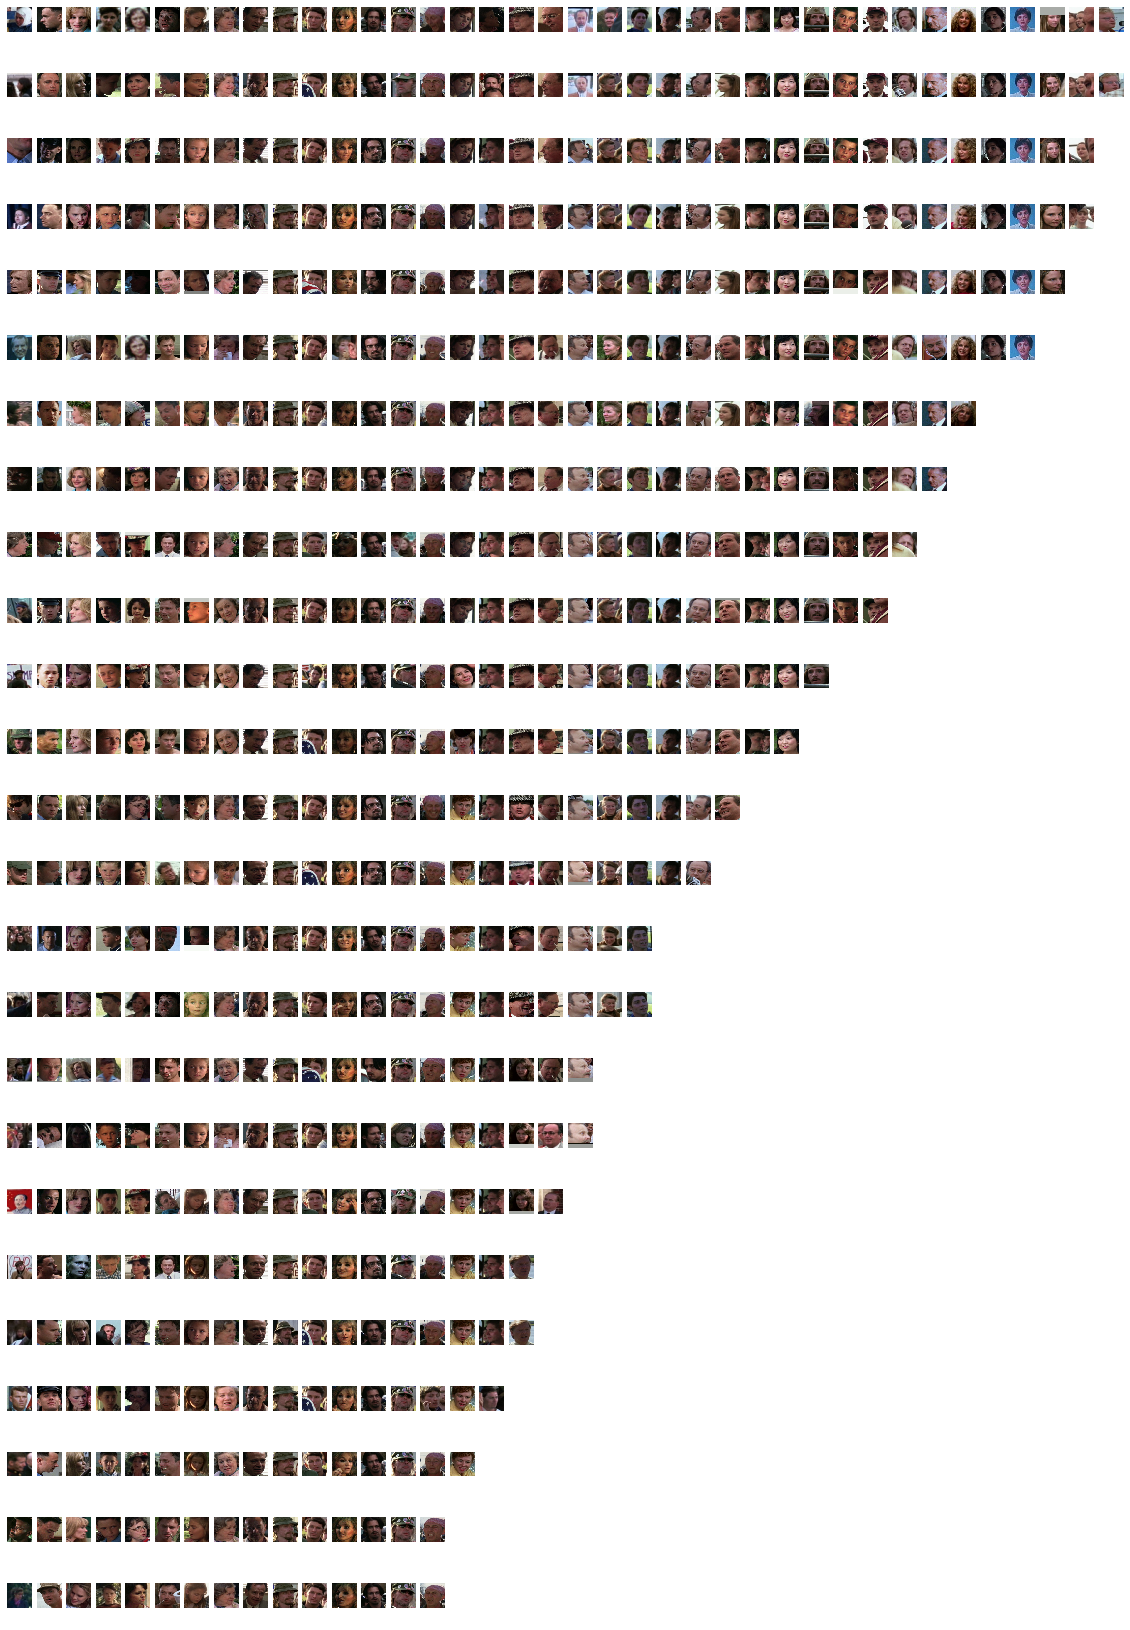

In [83]:
plotting.plot_clusters(clusters, n_sample=25, figsize=(20, 30))